Data Analysis & Cleaning:

Clean and organize the data into a usable format.

In [2]:
#Imported Pandas dataframe (df) to read provided CSV file
import pandas as pnd
#Imported Python plotting library for graphs and data visualization
import matplotlib.pyplot as plt

def readCSV(file):
    return pnd.read_csv(file)

df = readCSV('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

#Ensured that df contains the correct contents of the provided CSV file
df

#Removed User ID column from df, as indexing is automatically provided in dataframes
df.drop('User ID', axis=1, inplace=True)

#Shortened column names
df.rename(columns={'Fan Challenges Completed': 'fanChalComplete', \
'Predictive Accuracy (%)': 'predictAccuracy', 'Virtual Merchandise Purchases': 'vMerchPurch', \
    'Sponsorship Interactions (Ad Clicks)': 'adClicks', 'Time on Live 360 (mins)': 'live360Time', \
        'Real-Time Chat Activity (Messages Sent)': 'msgsSent'}, inplace=True)

#Ensured renamed columns were in place
df

#Identified cells with missing values (none occured)
df.isna()


,fanChalComplete,predictAccuracy,vMerchPurch,adClicks,live360Time,msgsSent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


Investigate trends:

Which users are most likely to purchase virtual merchandise?

In [6]:

#Created a new df consisting of the 15 users with the most merchandise purchases in descending order
high_merch_df = df.sort_values(by='vMerchPurch', ascending=False).head(15)
high_merch_df.reset_index(drop=True, inplace=True)

#Ran several statements outputting the mean values of each column for the full df and the high merchandise df
#Commented values are the output of the line of code above it
df.loc[:, 'fanChalComplete'].mean()
#5.79
high_merch_df.loc[:, 'fanChalComplete'].mean()
#6.8
df.loc[:, 'predictAccuracy'].mean()
#74.99%
high_merch_df.loc[:, 'predictAccuracy'].mean()
#80.33%
df.loc[:, 'adClicks'].mean()
#8.68
high_merch_df.loc[:, 'adClicks'].mean()
#9.93
df.loc[:, 'live360Time'].mean()
#129.35
high_merch_df.loc[:, 'live360Time'].mean()
#123.07
df.loc[:, 'msgsSent'].mean()
#25.05
high_merch_df.loc[:, 'msgsSent'].mean()
#25.27

#Fan Challenges and Ad Clicks produced the most meaningful variation in mean values.
#Created a new df of 15 users with the least merchandise purchases
low_merch_df = df.sort_values(by='vMerchPurch', ascending=False).tail(15)
low_merch_df.reset_index(drop=True, inplace=True)

#Found mean values of low merch purchases df for fan challenges and ad clicks
low_merch_df.loc[:, 'fanChalComplete'].mean()
#5.73
low_merch_df.loc[:, 'adClicks'].mean()
#7.40


7.4

Analysis of Users who Purchased High Amounts of Virtual Merchandise

Upon comparison of the mean values for each column of the original dataset and the modified dataset, consisting of the 15 users with the most and the least virtual merchandise purchases, there is evidence that users who complete more fan challenges and interact with more advertisements will be more likely to purchase virtual merchandise. This insight informs TechPoint of the success that advertisements and fan engagement has on users' inclinations to purchase virtual items in the app.  

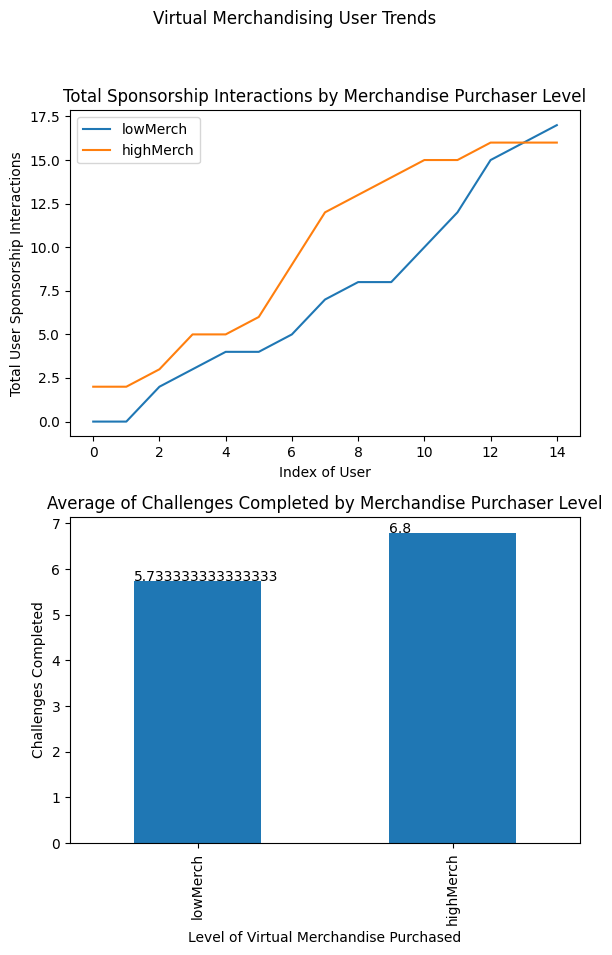

In [37]:
#The following function generates two visuals
#One is a double line graph of the relationship between sponsorships with high and low vMerch users
#The second is a bar graph of the averages of the challenges completed by high and low vMerch users
def merchVisuals():
    #used temporary dataframes to sort the sponsorship interactions of the top 15 and 
    #bottom 15 virtual merchandise purchasers. The values in the resulting df were the
    #sponsorship interactions of these users from least to greatest.
    def merchAndAds():
        temp_high_df = high_merch_df.sort_values(by='adClicks', ascending=True)
        temp_high_df.reset_index(drop=True, inplace=True)
        temp_df = pnd.DataFrame({'highMerch': temp_high_df['adClicks']})
        temp_low_df = low_merch_df.sort_values(by='adClicks', ascending=True)
        temp_low_df.reset_index(drop=True, inplace=True)
        temp_df.insert(1, "lowMerch", temp_low_df['adClicks'], True)
        return temp_df[['lowMerch', 'highMerch']]
    #Used a temporary dataframe to hold the total fan challenges completed for the top 15 and
    #bottom 15 users in regards to purchasing virtual merchandise. The return values are the 
    #averages of challenges completed for these two user groups
    def merchAndChallenges():
        temp_df = pnd.DataFrame({'highMerch': high_merch_df['fanChalComplete']})
        temp_df.insert(1, "lowMerch", low_merch_df['fanChalComplete'], True)
        return temp_df[['lowMerch', 'highMerch']].mean()

    #Setup of the figure that held the two graphs
    fig, axs = plt.subplots(2, figsize=(6,10))
    merchAndAds().plot(ax=axs[0], kind='line')
    axs[0].set_title('Total Sponsorship Interactions by Merchandise Purchaser Level')
    axs[0].set_xlabel('Index of User')
    axs[0].set_ylabel('Total User Sponsorship Interactions')
    merchAndChallenges().plot(ax=axs[1], kind='bar')
    axs[1].set_title('Average of Challenges Completed by Merchandise Purchaser Level')
    axs[1].set_xlabel('Level of Virtual Merchandise Purchased')
    axs[1].set_ylabel('Challenges Completed')
    fig.suptitle('Virtual Merchandising User Trends')
    #Prevented graph labels from overlapping
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

#Called the plotting function to display as output
merchVisuals()

    


Analysis of Visualizations (above)

While the number of sponsorship interactions and fan challenges completed are relative to a small sample size, it is important to note that there is notable differences in the interactions with these two features between users with the highest amount of virtual merchandise purchases compared to the users with the lowest amount of virtual purchases. 

It can be seen in the graph of total sponsorship interactions that the line representing users of low merchandise purchases (lowMerch) remains about two interactions below the high purchaser line before leveling off near the end. This insight can inform TechPoint that there are sponsors that accurately reflect the wants of the high spending section of the VeloCityX audience.

Observing the bottom graph, the users who purchased the most virtual merchandise (highMerch) completed about 15% more fan challenges than users who purchased the fewest. This can signify the success of earning points from fan challenges in a user's willingness to buy virtual rewards.

How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? 

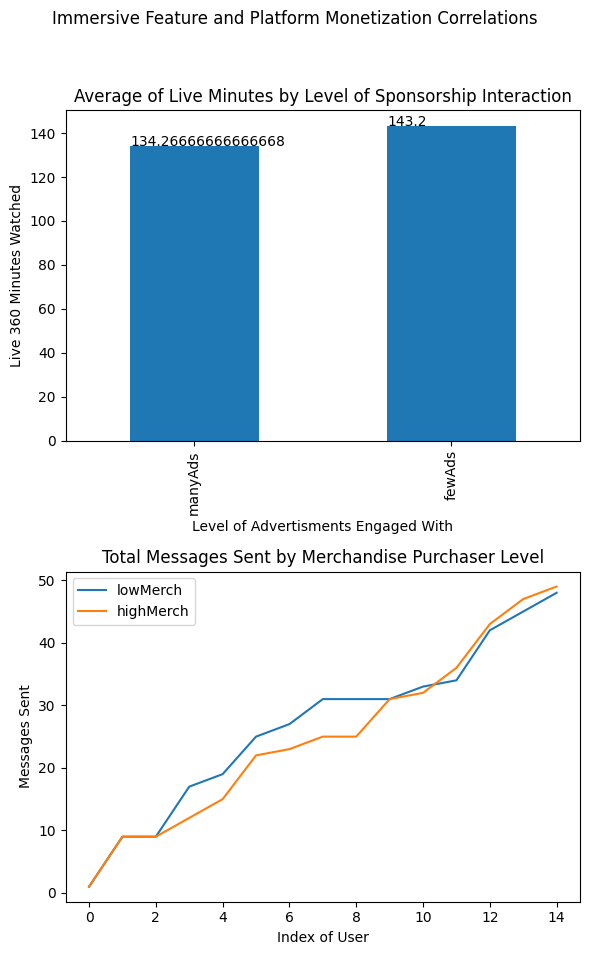

In [16]:
#Created two new dataframes consisting of the 15 users with the most sponsorship engagement and
#the 15 users with the least engagement, similar to the virtual merchandise dfs created previously
high_ads_df = df.sort_values(by='adClicks', ascending=False).head(15)
high_ads_df.reset_index(drop=True, inplace=True)
low_ads_df = df.sort_values(by='adClicks', ascending=False).tail(15)
low_ads_df.reset_index(drop=True, inplace=True)


def engagementVisuals():
    #Selected the minutes of live time watched from the users with the highest and lowest 
    #sponsorship engagement. The values in the resulting df were the averages of minutes 
    #watched for these two user groups.
    def livesAndAds():
        temp_df = pnd.DataFrame({'manyAds': high_ads_df['live360Time']})
        temp_df.insert(1, "fewAds", low_ads_df['live360Time'], True)
        return temp_df[['manyAds', 'fewAds']].mean()
    #Sorted the messages sent from the top 15 and bottom 15 virtual merchandise purchasers. 
    #The values in the resulting df were the total messages sent from these users from least to greatest.
    def merchAndMessages():
        temp_high_df = high_merch_df.sort_values(by='msgsSent', ascending=True)
        temp_high_df.reset_index(drop=True, inplace=True)
        temp_df = pnd.DataFrame({'highMerch': temp_high_df['msgsSent']})
        temp_low_df = low_merch_df.sort_values(by='msgsSent', ascending=True)
        temp_low_df.reset_index(drop=True, inplace=True)
        temp_df.insert(1, "lowMerch", temp_low_df['msgsSent'], True)
        return temp_df[['lowMerch', 'highMerch']]
    
    #Similar graphing setup to the previous figure created
    fig, axs = plt.subplots(2, figsize=(6,10))
    livesAndAds().plot(ax=axs[0], kind='bar')
    axs[0].set_title('Average of Live Minutes by Level of Sponsorship Interaction')
    axs[0].set_xlabel('Level of Advertisments Engaged With')
    axs[0].set_ylabel('Live 360 Minutes Watched')
    merchAndMessages().plot(ax=axs[1], kind='line')
    axs[1].set_title('Total Messages Sent by Merchandise Purchaser Level')
    axs[1].set_xlabel('Index of User')
    axs[1].set_ylabel('Messages Sent')
    fig.suptitle('Immersive Feature and Platform Monetization Correlations')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

engagementVisuals()

Analysis of Visualizations (above)

In an attempt to find correlations between real-time events and monetization efforts of VeloCityX, no significant data came as a result. 

In reference to the bar graph between users with many sponsorship interactions and users with only a few, users with low sponsorship interaction averaged a slightly longer watchtime on the "Live 360" coverage. This is concerning because users who spend more time watching the racing events should come across more advertisements, yet there is no significant variation in sponsorship engagement. 

Also, in the double line graph between users with high virtual merchandise purchases and users with low purchases, there is little variation in messages sent between the two user groups. If a user would be passionate enough about autonomous racing to make multiple digital purchases, then one would think they would be more active in the live forums, boasting about their collectibles or discussing their favorite items. Yet, the visualizations are implying this is not the case for this platform. 

These visuals are especially important to investigate as these immersive features seem to have no effect on the spending of users, which hurts the profitability of the viewing experience on VeloCityX.

<Axes: xlabel='msgsSent', ylabel='live360Time'>

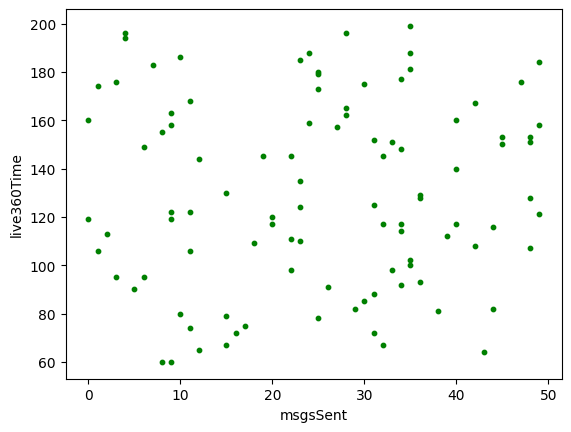

In [18]:
#Plotted a scatter plot between the fan experience variables, minutes spent on "Live 360" and
#messages sent, to determine the strength of their correlation
df.plot.scatter(x='msgsSent', y='live360Time', s=10, c='green')

Analysis of Scatter Plot (above)

One would think that the more time a user spends in a stream with a live chat feature, the more messages the user would send. However, when observing the above figure, which displays the total real-time messages sent for each user by their time (in minutes) spent on the "Live 360" coverage, there is no correlation between the two variables. No visible clusters of data points can be seen either, which is also important to note. Given the lack of relation between key immersive features, along with the previous visualizations between event coverage and monetization tactics, new designs will need to be implemented on the platform to stregthen the bond between engagement and monetization.

Proposal of a New Fan Challenge

As shown in the previous visualizations, there is a clear divide between the fan viewing experiences and the monetization efforts of VeloCityX. As such, I believe that Techpoint should invest its development efforts into a system that increasing rewards from fan challenges the more a user interacts with the "Live 360" coverage. This "reward boosting" could be something along the lines of a 25% point boost for a completed fan challenge if the user watches 30 minutes of the Live 360 coverage. This would not only reward the users with high viewing times to focus on completing fan challenges, it would also incentivize users that complete many fan challenges to tune into the racing events more often. As evidenced by the bar graph between users with the highest and lowest merchandise purchases, fan challenges have a significant influence on the user's desire to purchase digital goods, leading to higher profits if this system were to be implemented.

A few things that would need further research before and during the design phase of this system is the best percentage of "reward boosting" fan challenges recieve after watching enough of the Live 360 coverage. too little of a boost would not motivate any users to tune into the live coverage, but too high of a boost would result in an overabundance of rewards points for users to redeem, leading to a potential loss of profit from users shifting to reward point redemptions instead of purchasing digital merchandise with their own money. This is why I think that a 25% boost is sufficient. 

Another potential issue to take note of is there is no accurate way of tracking whether a user is immersed in the Live 360 coverage. A user could turn the coverage on to collect a profit booster while they do a different activity. A way to circumvent this could be to prompt the user to change camera angles or send a chat message every 15 minutes or so, but that is likely to flood the live forums with unecessary media and prevent the user from relaxing and enjoying the live feed with the enforcement of time-based actions. Despite it's potential concerns, this reward boosting system is a great step towards bridging VeloCityX's gap between real-time experiences and monetary gain.